In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import GPflow

In [2]:
M = 6  # Number of inducing points. Make sure to not give enough to see the difference with inter-domain.

## Generate some data

In [3]:
X = (rnd.rand(400, 1) * 6) - 3
Y = (np.sin(X**2) + 0.5 * np.cos(X*5) + rnd.randn(*X.shape) * 0.3)

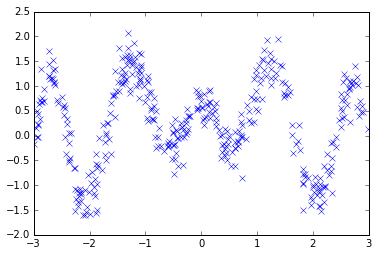

In [4]:
plt.plot(X, Y, 'x')

## Inducing point method

In [5]:
k = GPflow.kernels.RBF(1)
# Z = np.dstack((X[rnd.permutation(len(X))[:M], :], np.ones((M, 1)) - 2))
Z = X[rnd.permutation(len(X))[:M], :]

In [6]:
m = GPflow.svgp.SVGP(X, Y, k, GPflow.likelihoods.Gaussian(), Z)

In [7]:
m.likelihood.fixed = True
m.kern.variance.fixed = True
m.optimize()
m.likelihood.fixed = False
m.kern.variance.fixed = False
r = m.optimize()
print r.fun

compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
372.926580363


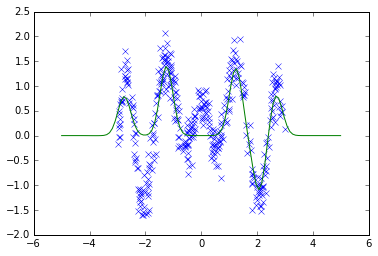

In [8]:
Xp = np.linspace(-5, 5, 100)[:, None]
Yp, Ypv = m.predict_f(Xp)
plt.plot(X, Y, 'x')
plt.plot(Xp, Yp)

## Multiscale method

In [9]:
kms = GPflow.kernels.RBFMultiscale(1)
Zms = np.dstack((X[rnd.permutation(len(X))[:M], :], np.ones((M, 1)) - 2))

In [10]:
mms = GPflow.svgp.SVGP(X, Y, kms, GPflow.likelihoods.Gaussian(), Zms)
mms.likelihood.fixed = True
mms.kern.variance.fixed = True
mms.optimize()
mms.likelihood.fixed = False
mms.kern.variance.fixed = False
r = mms.optimize()
print r.fun

compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
233.906605154


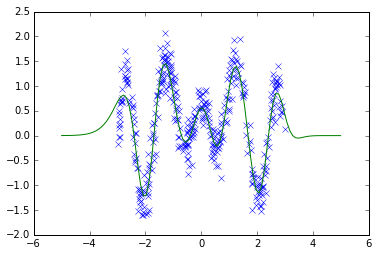

In [11]:
Xp = np.linspace(-5, 5, 100)[:, None]
Yp, Ypv = mms.predict_f(Xp)
plt.plot(X, Y, 'x')
plt.plot(Xp, Yp)

We see that the multiscale method performs a lot better! Also in terms of the likelihood bound. Looking at the parameters of the inducing points, we see that some basis functions have become wider!

In [12]:
Zms

array([[[ 0.61508138, -2.34589418]],

       [[-0.4861226 , -0.34110711]],

       [[-0.52644763, -0.76417683]],

       [[ 2.22267326, -1.56658352]],

       [[-1.96920215, -2.7278807 ]],

       [[ 2.5970878 , -3.60978439]]])